In [1]:
import json
# import pandas as pd
import numpy as np

In [14]:
REVIEW_PATH = "../data/yelp_academic_dataset_review.json"

def read_data(limit: int) -> list:
    lengths = []
    with open(REVIEW_PATH) as f:
        for idx, line in enumerate(f):
            if idx >= limit:
                break
            lengths.append(len(json.loads(line)["text"]))

    # lengths = np.array([[l] for l in lengths])
    return lengths

lengths = read_data(1000)

# Algorithm

```
Input : Set of points Pi
Output: Set of clusters Cˆ

Select K initial centroids;
repeat
	Assign all points to the closest centroid;
	Recompute centroids;
until Centroids don’t change;
```

In [15]:
import random
import matplotlib.pyplot as plt

class KMeansClustering:
    def __init__(self, k: int, seed: int = 0):
        self.k = k
        random.seed(seed)

    def compute_mean(self, cluster):
        if len(cluster) == 0:
            return 0
        return sum(cluster) / len(cluster)

    def fit(self, data: list, threshold: float = 0.001):
        centroids = random.sample(data, self.k)
        clusters = {i: [] for i in range(self.k)}
        labels = []

        while True:
            labels = []
            for value in data:
                closest_centroid_idx = 0
                closest_distance = abs(centroids[0] - value)
                for idx, centroid in enumerate(centroids[1:], start=1):
                    distance = abs(centroid - value)
                    if distance < closest_distance:
                        closest_centroid_idx = idx
                        closest_distance = distance
                labels.append(closest_centroid_idx)
                clusters[closest_centroid_idx].append(value)

            new_centroids = [self.compute_mean(cluster) for cluster in clusters.values()]
            
            total_shift = sum(abs(new - old) for new, old in zip(new_centroids, centroids))
            print(total_shift)
            if total_shift < threshold:
                break

            centroids = new_centroids

        self.centroids = centroids
        self.labels = labels

In [17]:
def plot(data, labels):
	colors = ['red', 'green', 'blue']

	for i, cluster in enumerate(labels):
		plt.scatter(data[i], [cluster], c=colors[int(cluster)], label=f'Cluster {cluster+1}')

	plt.show()

In [16]:
kmeans = KMeansClustering(k=3)
kmeans.fit(lengths, 0.1)

356.81844177808364
137.5566750675655
86.9538359158746
62.74036484102086
50.57696640721019
39.66723930302399
33.24863892709922
29.284015420902932
25.449961294601763
23.023830377723385
21.569207718991493
19.44851357146038
17.802256597407165
16.90487566607237
15.459543083500137
14.04488187514454
13.646556995740951
12.469220153987806
12.477237682969673
11.90179323787379
10.958268146771758
10.206309441695709
9.825460739565102
9.37631091660711
9.246132989746002
8.786883891873828
8.422457161175487
8.210550013484976
7.910574438822806
7.81096823286029
7.419496765140934
7.194128163797529
6.828970802746483
6.545484991732138
6.256249037002476
6.111546889448306
6.100316519925059
6.117907788446445
5.880185618135329
5.819019591767045
5.604663567815493
5.403273115423531
5.301219295748126
5.120570604051153
4.929327671178044
4.748781111667313
4.598109189805797
4.4358690450294205
4.480729204398273
4.348837385391278
4.260526997688146
4.121856698419663
4.1015284244550685
4.083227548850061
4.140752965243109

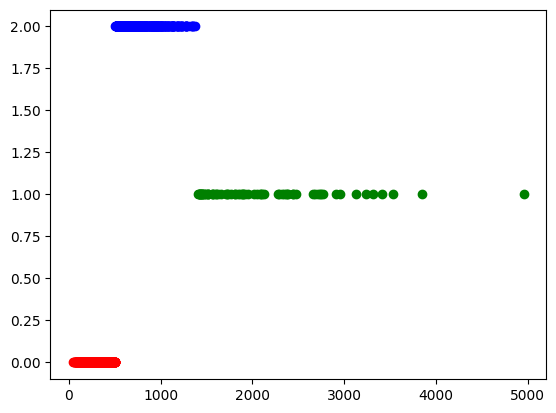

In [18]:
plot(lengths, kmeans.labels)